In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
data_info = pd.read_csv('./lending_club_info.csv',index_col='LoanStatNew')

In [10]:
print(data_info)

                                                            Description
LoanStatNew                                                            
loan_amnt             The listed amount of the loan applied for by t...
term                  The number of payments on the loan. Values are...
int_rate                                      Interest Rate on the loan
installment           The monthly payment owed by the borrower if th...
grade                                            LC assigned loan grade
sub_grade                                     LC assigned loan subgrade
emp_title             The job title supplied by the Borrower when ap...
emp_length            Employment length in years. Possible values ar...
home_ownership        The home ownership status provided by the borr...
annual_inc            The self-reported annual income provided by th...
verification_status   Indicates if income was verified by LC, not ve...
issue_d                             The month which the loan was

In [11]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [12]:
df = pd.read_csv('./lending_club_loan_two.csv')

In [13]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [15]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<AxesSubplot:xlabel='total_acc', ylabel='mort_acc'>

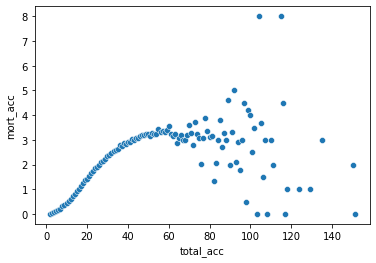

In [16]:
# Comparing mort_acc vs total_acc, there is a definite pattern in the mean. This suggests an imputation scheme
sns.scatterplot(data = df[["total_acc", "mort_acc"]].groupby(by="total_acc").mean(), x ="total_acc", y = "mort_acc")

In [17]:
for i in range(2, 58):
    df[df["mort_acc"].isna() & df["total_acc"] == i]["mort_acc"] = df[df["total_acc"] == i]["mort_acc"].mean(skipna=True)

df[df["mort_acc"].isna() & df["total_acc"] >= 57] =  df[df["total_acc"] >= 57 ]["mort_acc"].mean(skipna=True)

In [18]:
# pub_rec_backruptcies are hard to model with other variables. Impute with mode value: 0
df["pub_rec_bankruptcies"].value_counts()
df["pub_rec_bankruptcies"].fillna(0, inplace=True)

<AxesSubplot:>

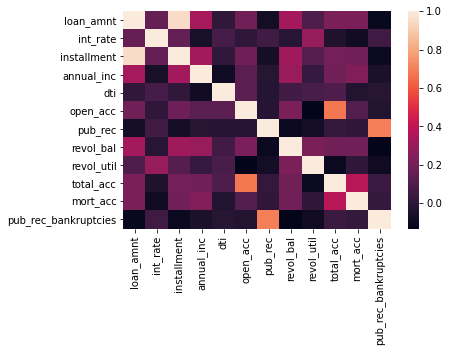

In [19]:
sns.heatmap(data = df.corr())

In [20]:
# reovl_util is difficult to model with other variables (no discernable pattern). Impute with mean.
np.mean(df["revol_util"])
df["revol_util"].fillna(np.mean(df["revol_util"]), inplace=True)

Text(0.5, 1.0, 'Installment vs loan amount')

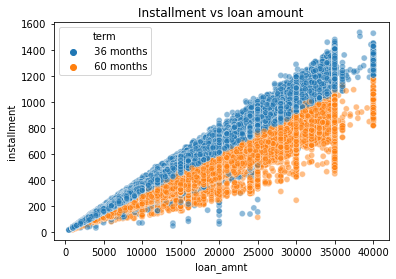

In [21]:
#installment and loan_amnt are highly correlated
sns.scatterplot(data=df, y="installment", x="loan_amnt", hue="term", alpha=0.5)
plt.title("Installment vs loan amount")

In [22]:
#Feature engineering

# Get years from the strings
def get_num_years(r):
    emp_str = r["emp_length"]
    options = {'< 1 year': 0,
               '1 year' : 1,
               '2 years' : 2,
               '3 years' : 3,
               '4 years' : 4,
               '5 years' : 5,
               '6 years' : 6,
               '7 years' : 7,
               '8 years' : 8,
               '9 years' : 9,
               '10+ years' : 10,
               np.nan :  -1}
    return options[emp_str]
emp_length_int = df.apply(get_num_years, axis=1)

# Get the first three digits from a zipcode
zipcodes = df["address"].apply(lambda s: int(s[-6:-2]))

#Get the number of years since earliest credit line (assuming months are unimportant)
years_since_earliest_cr_line = 2013 - pd.to_datetime(df['earliest_cr_line']).dt.year

#Make dummy variables for the categorical data
make_dummy_variables = ["home_ownership", "verification_status", \
                        "initial_list_status", "application_type", \
                        "purpose"]
dummy_variables = pd.get_dummies(data=df[make_dummy_variables], drop_first=True)

#Factorize the sub-grades
subggrade_factors = pd.factorize(df["sub_grade"], sort=True)[0]

#Factorize dates by converting to date times, sorting
issue_d_factors = pd.factorize(pd.to_datetime(df['issue_d']), sort=True)[0]

In [23]:
feature_dict = {"emp_length_int" : emp_length_int, 
                "zipcodes": zipcodes, 
                "years_since_earliest_cr_line": years_since_earliest_cr_line, 
                "subggrade_factors": subggrade_factors}
feature_df = pd.DataFrame(feature_dict)


In [24]:
numeric_cols = ["loan_amnt", "int_rate", 'annual_inc', 'dti', 'open_acc', \
                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', \
                'pub_rec_bankruptcies', 'installment']
X = pd.concat([df[numeric_cols], feature_df, dummy_variables], axis = 1)
X.fillna(0, inplace=True)
y = pd.get_dummies(data=df["loan_status"], drop_first=True)



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_val, X_test = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=40, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [28]:
model.fit(x = X_train, 
          y=y_train, 
          epochs=300, 
          validation_data=(X_val, y_val), 
          callbacks=[early_stop])

Epoch 1/300
7426/7426 [==============================] - 6s 708us/step - loss: 0.3846 - val_loss: 0.3616
Epoch 2/300
7426/7426 [==============================] - 5s 649us/step - loss: 0.3489 - val_loss: 0.3223
Epoch 3/300
7426/7426 [==============================] - 5s 653us/step - loss: 0.2915 - val_loss: 0.2769
Epoch 4/300
7426/7426 [==============================] - 5s 655us/step - loss: 0.2768 - val_loss: 0.2748
Epoch 5/300
7426/7426 [==============================] - 5s 665us/step - loss: 0.2747 - val_loss: 0.2721
Epoch 6/300
7426/7426 [==============================] - 5s 659us/step - loss: 0.2733 - val_loss: 0.2720
Epoch 7/300
7426/7426 [==============================] - 5s 661us/step - loss: 0.2722 - val_loss: 0.2703
Epoch 8/300
7426/7426 [==============================] - 5s 660us/step - loss: 0.2710 - val_loss: 0.2685
Epoch 9/300
7426/7426 [==============================] - 5s 661us/step - loss: 0.2686 - val_loss: 0.2659
Epoch 10/300
7426/7426 [==============================]

In [29]:
model.save("lending_club_nn.h5")

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63     11753
           1       0.88      0.99      0.93     47652

    accuracy                           0.89     59405
   macro avg       0.91      0.73      0.78     59405
weighted avg       0.90      0.89      0.87     59405



In [31]:
print(confusion_matrix(y_val, y_pred))

[[ 5491  6262]
 [  321 47331]]
